In [1]:
#importing and loading the data using the 4 libraries as told
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#mounting Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

#defining the file path of the given dataset
file_path = "/content/drive/MyDrive/assignment 1/Human_Development_Index_Dataset.csv"

#reading the dataset with appropriate encoding
df = pd.read_csv(file_path, encoding="latin1")

print("Dataset loaded successfully")
print("Dataset shape:", df.shape)



Mounted at /content/drive
Dataset loaded successfully
Dataset shape: (6798, 30)


In [3]:
#displaying the first 10 records to understand dataset structure
print("First 10 rows of the dataset:")
print(df.head(10).to_string(index=False))



First 10 rows of the dataset:
 Unnamed: 0 iso3     country  year   hdi  life_expectancy  pop_millions  hdi_f  hdi_m  life_expec_f  life_expec_m  expec_yr_school  expec_yr_school_f  expec_yr_school_m  mean_yr_school  mean_yr_school_f  mean_yr_school_m  gross_inc_percap  gross_inc_percap_f  gross_inc_percap_m  gender_development  gender_inequality  secondary_education_f_%  secondary_education_m_%  seats_in_parliament_f_%  seats_in_parliament_m_%  labour_participation_f_%  labour_participation_m_%  co2_emission_tons  mat_footprint_percap_tons
          1  AFG Afghanistan  1990 0.284           45.967     10.694796    NaN    NaN        48.397        43.709         2.936460           2.117230           4.532768        0.871962          0.201659          1.493952       3115.670448                 NaN                 NaN                 NaN                NaN                 1.107733                 7.899011                      NaN                      NaN                       NaN           

In [4]:
#verifying that the 'year' column exists in the dataset
if "year" not in df.columns:
    raise KeyError("The 'year' column is missing from the dataset")

#identifying all unique years available
available_years = sorted(df["year"].dropna().unique())
print("Years available in the dataset:")
print(available_years)

#extracting data for the most recent year (2022)
hdi_2022_df = df[df["year"] == 2022].copy()

print("\nDataset filtered for year 2022")
print("Shape after filtering:", hdi_2022_df.shape)


Years available in the dataset:
[np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]

Dataset filtered for year 2022
Shape after filtering: (206, 30)


In [5]:
#displaying initial rows of the 2022 dataset
print("First 10 rows for year 2022:")
print(hdi_2022_df.head(10).to_string(index=False))

#counting total rows and columns
row_count, col_count = hdi_2022_df.shape
print("\nTotal rows:", row_count)
print("Total columns:", col_count)

#listing column names with their respective data types
print("\nColumn names and data types:")
print(pd.DataFrame({
    "Column Name": hdi_2022_df.columns,
    "Data Type": [str(hdi_2022_df[c].dtype) for c in hdi_2022_df.columns]
}).to_string(index=False))



First 10 rows for year 2022:
 Unnamed: 0 iso3             country  year   hdi  life_expectancy  pop_millions    hdi_f    hdi_m  life_expec_f  life_expec_m  expec_yr_school  expec_yr_school_f  expec_yr_school_m  mean_yr_school  mean_yr_school_f  mean_yr_school_m  gross_inc_percap  gross_inc_percap_f  gross_inc_percap_m  gender_development  gender_inequality  secondary_education_f_%  secondary_education_m_%  seats_in_parliament_f_%  seats_in_parliament_m_%  labour_participation_f_%  labour_participation_m_%  co2_emission_tons  mat_footprint_percap_tons
         33  AFG         Afghanistan  2022 0.462           62.879     41.128771 0.332443 0.534145        66.213        59.766        10.705385           8.053257          13.228449        2.514790          1.174130          3.912740       1335.205733          395.915459         2256.217507               0.622              0.665                 7.042050                24.077040                27.215190                72.784810              

In [6]:
#checking the count of missing values in each column
print("Missing value count per column:")
missing_counts = hdi_2022_df.isnull().sum()
print(missing_counts[missing_counts > 0].to_string())



Missing value count per column:
hdi                           2
hdi_f                        13
hdi_m                        13
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41


In [7]:
#checking number of duplicate records before cleaning
duplicates_before = hdi_2022_df.duplicated().sum()
print("\nDuplicate rows before removal:", duplicates_before)

#removing duplicate rows
hdi_2022_df = hdi_2022_df.drop_duplicates().copy()

duplicates_after = hdi_2022_df.duplicated().sum()
print("Duplicate rows after removal:", duplicates_after)

#converting numeric columns stored as text into numeric format
for col in hdi_2022_df.columns:
    if hdi_2022_df[col].dtype == "object" and col != "country":
        hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors="coerce")

print("\nData types after conversion:")
print(hdi_2022_df.dtypes)




Duplicate rows before removal: 0
Duplicate rows after removal: 0

Data types after conversion:
Unnamed: 0                     int64
iso3                         float64
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                 float64
expec_yr_school              float64
expec_yr_school_f            float64
expec_yr_school_m            float64
mean_yr_school               float64
mean_yr_school_f             float64
mean_yr_school_m             float64
gross_inc_percap             float64
gross_inc_percap_f           float64
gross_inc_percap_m           float64
gender_development           float64
gender_inequality            float64
secondary_education_f_%      float64
secondary_education_m_%      float64
seats_in_parliam

In [8]:
#defining essential columns required for analysis
essential_columns = ["country", "year", "hdi"]

#checking missing values in essential columns
print("\nMissing values in essential columns:")
print(hdi_2022_df[essential_columns].isnull().sum().to_string())

#removing rows with missing essential information
rows_before = hdi_2022_df.shape[0]
hdi_2022_df = hdi_2022_df.dropna(subset=essential_columns).copy()
rows_after = hdi_2022_df.shape[0]

print("Rows removed due to missing essential values:", rows_before - rows_after)




Missing values in essential columns:
country    0
year       0
hdi        2
Rows removed due to missing essential values: 2


In [9]:
#computing descriptive statistics for HDI
hdi_mean = hdi_2022_df["hdi"].mean()
hdi_median = hdi_2022_df["hdi"].median()
hdi_std = hdi_2022_df["hdi"].std()

print("Mean HDI:", hdi_mean)
print("Median HDI:", hdi_median)
print("Standard deviation of HDI:", hdi_std)

# identifying countries with maximum and minimum HDI
highest_hdi = hdi_2022_df.loc[hdi_2022_df["hdi"].idxmax()]
lowest_hdi = hdi_2022_df.loc[hdi_2022_df["hdi"].idxmin()]

print("\nCountry with highest HDI:", highest_hdi["country"], "-", highest_hdi["hdi"])
print("Country with lowest HDI:", lowest_hdi["country"], "-", lowest_hdi["hdi"])


Mean HDI: 0.7228872549019609
Median HDI: 0.7395
Standard deviation of HDI: 0.15302880386427825

Country with highest HDI: Switzerland - 0.967
Country with lowest HDI: Somalia - 0.38


In [10]:
#filtering countries with HDI greater than 0.800
high_hdi_df = hdi_2022_df[hdi_2022_df["hdi"] > 0.800].copy()

#sorting filtered data by gross income per capita in descending order
high_hdi_sorted = high_hdi_df.sort_values(by="gross_inc_percap", ascending=False)

print("Top 10 countries with HDI above 0.800 sorted by income:")
print(high_hdi_sorted[["country", "hdi", "gross_inc_percap"]].head(10).to_string(index=False))



Top 10 countries with HDI above 0.800 sorted by income:
               country   hdi  gross_inc_percap
         Liechtenstein 0.942      146673.24150
                 Qatar 0.875       95944.37754
             Singapore 0.949       88761.14559
               Ireland 0.950       87467.51391
            Luxembourg 0.927       78554.23640
  United Arab Emirates 0.937       74103.71494
           Switzerland 0.967       69432.78669
                Norway 0.966       69189.76165
         United States 0.927       65564.93798
Hong Kong, China (SAR) 0.956       62485.50516


In [11]:
#defining a function to categorize HDI values
def hdi_category(value):
    if pd.isna(value):
        return np.nan
    elif value < 0.550:
        return "Low"
    elif value <= 0.699:
        return "Medium"
    elif value <= 0.799:
        return "High"
    else:
        return "Very"

#applying the categorization function
hdi_2022_df["HDI Category"] = hdi_2022_df["hdi"].apply(hdi_category)

print("HDI category distribution:")
print(hdi_2022_df["HDI Category"].value_counts(dropna=False).to_string())

#verifying classification boundaries
print("\nHDI category verification:")
print(
    hdi_2022_df.groupby("HDI Category")["hdi"]
    .agg(["count", "min", "max"])
    .sort_index()
    .to_string()
)


HDI category distribution:
HDI Category
Very      71
High      54
Medium    44
Low       35

HDI category verification:
              count    min    max
HDI Category                     
High             54  0.700  0.799
Low              35  0.380  0.549
Medium           44  0.550  0.699
Very             71  0.801  0.967


In [12]:
#saving the processed dataset to Google Drive
output_path = "/content/drive/MyDrive/assignment 1/HDI category added.csv"
hdi_2022_df.to_csv(output_path, index=False)

print("Final processed file saved at:")
print(output_path)



Final processed file saved at:
/content/drive/MyDrive/assignment 1/HDI category added.csv


In [13]:
#defining the years required for trend analysis
years_required = [2020, 2021, 2022]

#filtering dataset for required years
hdi_2020_2022_df = df[df["year"].isin(years_required)].copy()

print("Dataset filtered for years 2020 to 2022")
print("Shape:", hdi_2020_2022_df.shape)

#displaying first 10 rows for verification
print(hdi_2020_2022_df.head(10).to_string(index=False))


Dataset filtered for years 2020 to 2022
Shape: (618, 30)
 Unnamed: 0 iso3     country  year   hdi  life_expectancy  pop_millions    hdi_f    hdi_m  life_expec_f  life_expec_m  expec_yr_school  expec_yr_school_f  expec_yr_school_m  mean_yr_school  mean_yr_school_f  mean_yr_school_m  gross_inc_percap  gross_inc_percap_f  gross_inc_percap_m  gender_development  gender_inequality  secondary_education_f_%  secondary_education_m_%  seats_in_parliament_f_%  seats_in_parliament_m_%  labour_participation_f_%  labour_participation_m_%  co2_emission_tons  mat_footprint_percap_tons
         31  AFG Afghanistan  2020 0.488           62.575     38.972231 0.381373 0.548741        65.432        59.866        10.705385           8.053257          13.228449        2.841610          2.050737          3.407107       1986.803772          670.996249         3275.057369               0.695              0.674                 6.092345                15.945160                27.215190                72.784810  

In [14]:
#saving filtered dataset for Problem 1B
output_1b_path = "/content/drive/MyDrive/assignment 1/HDI problem1B.csv"
hdi_2020_2022_df.to_csv(output_1b_path, index=False)

print("Problem 1B dataset saved at:")
print(output_1b_path)


Problem 1B dataset saved at:
/content/drive/MyDrive/assignment 1/HDI problem1B.csv


In [15]:
#defining essential columns for trend analysis
essential_cols = ["country", "year", "hdi"]

#checking missing values before cleaning
print("Missing values before cleaning:")
print(hdi_2020_2022_df[essential_cols].isnull().sum().to_string())

#removing duplicate rows
dup_before = hdi_2020_2022_df.duplicated().sum()
hdi_2020_2022_df = hdi_2020_2022_df.drop_duplicates().copy()
dup_after = hdi_2020_2022_df.duplicated().sum()

print("Duplicate rows before:", dup_before)
print("Duplicate rows after:", dup_after)

#converting numeric columns stored as text into numeric
for col in hdi_2020_2022_df.columns:
    if hdi_2020_2022_df[col].dtype == "object" and col != "country":
        hdi_2020_2022_df[col] = pd.to_numeric(hdi_2020_2022_df[col], errors="coerce")

#dropping rows with missing essential values
rows_before = hdi_2020_2022_df.shape[0]
hdi_2020_2022_df = hdi_2020_2022_df.dropna(subset=essential_cols).copy()
rows_after = hdi_2020_2022_df.shape[0]

print("Rows removed due to missing essential values:", rows_before - rows_after)


Missing values before cleaning:
country    0
year       0
hdi        8
Duplicate rows before: 0
Duplicate rows after: 0
Rows removed due to missing essential values: 8


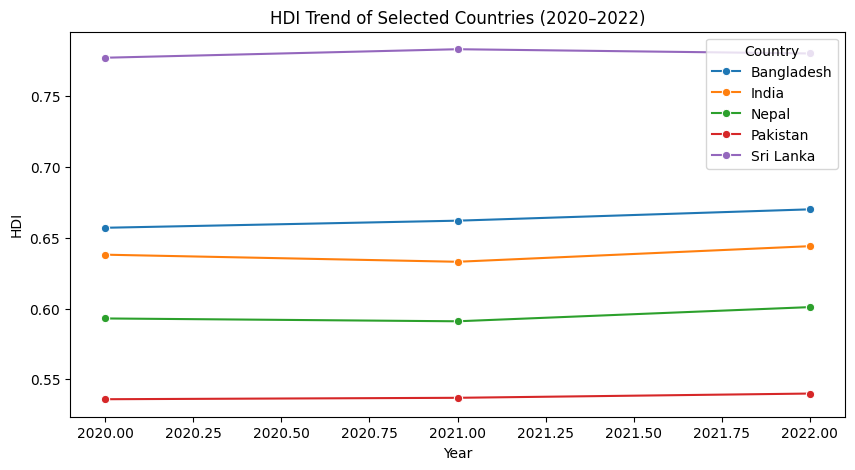

Caption: This line chart illustrates the change in HDI values from 2020 to 2022 for selected South Asian countries.


In [16]:
#selecting five countries for HDI trend visualization
selected_countries = ["Nepal", "India", "Bangladesh", "Pakistan", "Sri Lanka"]

#filtering dataset for selected countries
trend_df = hdi_2020_2022_df[hdi_2020_2022_df["country"].isin(selected_countries)].copy()

plt.figure(figsize=(10, 5))
sns.lineplot(data=trend_df, x="year", y="hdi", hue="country", marker="o")

plt.title("HDI Trend of Selected Countries (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.legend(title="Country")
plt.show()

print(
    "Caption: This line chart illustrates the change in HDI values "
    "from 2020 to 2022 for selected South Asian countries."
)


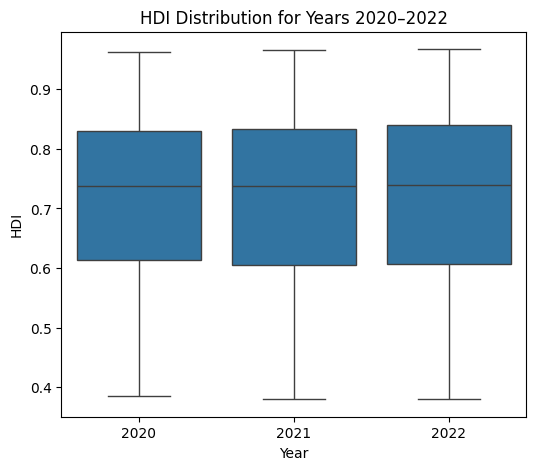

Caption: This box plot shows the distribution of HDI values for each year, highlighting median values and variability.


In [17]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=hdi_2020_2022_df, x="year", y="hdi")

plt.title("HDI Distribution for Years 2020–2022")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.show()

print(
    "Caption: This box plot shows the distribution of HDI values for each year, "
    "highlighting median values and variability."
)


In [18]:
#calculating average HDI by Region and Year (2020-2022)
possible_region_cols = ["Region", "region", "REGION"]
region_col = next((c for c in possible_region_cols if c in hdi_2020_2022_df.columns), None)

if region_col is None:
    print("Region variable not available in the dataset.")
else:
    region_avg = (
        hdi_2020_2022_df.groupby([region_col, "year"])["hdi"]
        .mean()
        .reset_index()
        .sort_values([region_col, "year"])
    )

    print("Average HDI by Region and Year (table):")
    print(region_avg.to_string(index=False))

    plt.figure(figsize=(10, 5))
    sns.barplot(data=region_avg, x=region_col, y="hdi", hue="year")
    plt.title("Average HDI by Region (2020-2022)")
    plt.xlabel("Region")
    plt.ylabel("Average HDI")
    plt.xticks(rotation=45)
    plt.legend(title="Year")
    plt.show()

    print(
        "Caption: This bar chart compares average HDI across regions for each year "
        "(2020, 2021, 2022)."
    )


Region variable not available in the dataset.


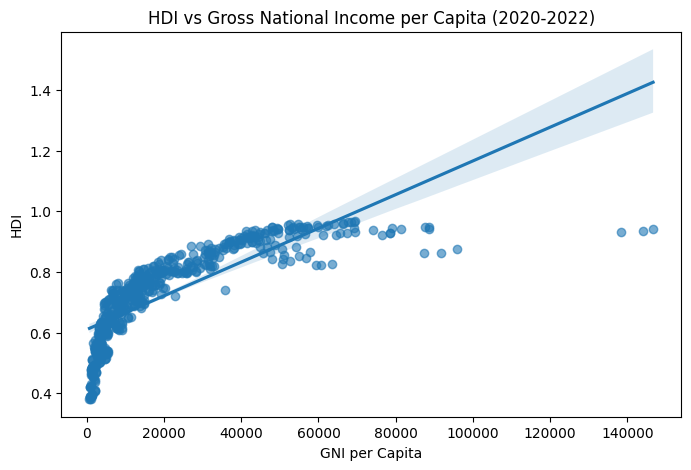

Caption: This scatter plot shows the relationship between income levels and HDI. Countries with higher income generally tend to have higher HDI.


In [19]:
#identifying gross national income per capita column
gni_column = "gross_inc_percap"

if gni_column not in hdi_2020_2022_df.columns:
    print("GNI per Capita variable not available in the dataset.")
else:
    #dropping rows where required values are missing
    scatter_df = hdi_2020_2022_df.dropna(subset=["hdi", gni_column]).copy()

    plt.figure(figsize=(8, 5))
    sns.regplot(data=scatter_df, x=gni_column, y="hdi", scatter_kws={"alpha": 0.6})

    plt.title("HDI vs Gross National Income per Capita (2020-2022)")
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.show()

    print(
        "Caption: This scatter plot shows the relationship between income levels "
        "and HDI. Countries with higher income generally tend to have higher HDI."
    )


In [20]:
#answering short analysis questions for 2020-2022
#calculating HDI change from 2020 to 2022 for each country
pivot_hdi = (
    hdi_2020_2022_df.pivot_table(index="country", columns="year", values="hdi", aggfunc="mean")
)

if 2020 in pivot_hdi.columns and 2022 in pivot_hdi.columns:
    pivot_hdi["HDI Change (2020 to 2022)"] = pivot_hdi[2022] - pivot_hdi[2020]
    change_df = pivot_hdi[["HDI Change (2020 to 2022)"]].dropna().reset_index()

    print("Top 10 HDI improvements (2020 to 2022):")
    print(
        change_df.sort_values("HDI Change (2020 to 2022)", ascending=False)
        .head(10)
        .to_string(index=False)
    )

    print()
    print("Top 10 HDI declines (2020 to 2022):")
    print(
        change_df.sort_values("HDI Change (2020 to 2022)", ascending=True)
        .head(10)
        .to_string(index=False)
    )
else:
    print("Required years (2020 and 2022) not found for HDI change calculation.")

#highest and lowest average HDI region across 2020-2022 (if region column exists)
possible_region_cols = ["Region", "region", "REGION"]
region_col = next((c for c in possible_region_cols if c in hdi_2020_2022_df.columns), None)

if region_col is None:
    print()
    print("Region analysis skipped because Region variable is not available in the dataset.")
else:
    region_overall_avg = hdi_2020_2022_df.groupby(region_col)["hdi"].mean().sort_values(ascending=False)
    print()
    print("Average HDI by Region (overall, 2020-2022):")
    print(region_overall_avg.to_string())

    print()
    print("Region with highest average HDI (2020-2022):", region_overall_avg.index[0])
    print("Region with lowest average HDI (2020-2022):", region_overall_avg.index[-1])

print()
print(
    "Discussion (global events): HDI changes from 2020 to 2022 can reflect COVID-19 impacts, "
    "including pressure on health systems, school disruptions, and income shocks. Recovery trends "
    "may differ across countries depending on policy response and economic stability."
)


Top 10 HDI improvements (2020 to 2022):
   country  HDI Change (2020 to 2022)
   Andorra                      0.041
Azerbaijan                      0.038
   Ecuador                      0.031
  Maldives                      0.025
    Mexico                      0.024
San Marino                      0.023
Tajikistan                      0.023
   Bahamas                      0.022
    Kuwait                      0.021
   Türkiye                      0.020

Top 10 HDI declines (2020 to 2022):
                         country  HDI Change (2020 to 2022)
                     Timor-Leste                     -0.067
                         Ukraine                     -0.028
                     Afghanistan                     -0.026
                         Namibia                     -0.024
                         Lebanon                     -0.019
Saint Vincent and the Grenadines                     -0.013
                        Suriname                     -0.012
           Eswatini (King

In [21]:
#defining South Asian countries as per assignment
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

#filtering dataset for South Asian countries
hdi_southasia_df = df[df["country"].astype(str).str.strip().isin(south_asia_countries)].copy()

print("South Asia subset created successfully")
print("Shape:", hdi_southasia_df.shape)

#displaying first 10 rows for verification
print(hdi_southasia_df.head(10).to_string(index=False))


South Asia subset created successfully
Shape: (264, 30)
 Unnamed: 0 iso3     country  year   hdi  life_expectancy  pop_millions  hdi_f  hdi_m  life_expec_f  life_expec_m  expec_yr_school  expec_yr_school_f  expec_yr_school_m  mean_yr_school  mean_yr_school_f  mean_yr_school_m  gross_inc_percap  gross_inc_percap_f  gross_inc_percap_m  gender_development  gender_inequality  secondary_education_f_%  secondary_education_m_%  seats_in_parliament_f_%  seats_in_parliament_m_%  labour_participation_f_%  labour_participation_m_%  co2_emission_tons  mat_footprint_percap_tons
          1  AFG Afghanistan  1990 0.284           45.967     10.694796    NaN    NaN        48.397        43.709         2.936460           2.117230           4.532768        0.871962          0.201659          1.493952       3115.670448                 NaN                 NaN                 NaN                NaN                 1.107733                 7.899011                      NaN                      NaN           

In [22]:
#saving South Asia dataset to Google Drive
output_sa_path = "/content/drive/MyDrive/assignment 1/HDI SouthAsia.csv"
hdi_southasia_df.to_csv(output_sa_path, index=False)

print("South Asia dataset saved at:")
print(output_sa_path)


South Asia dataset saved at:
/content/drive/MyDrive/assignment 1/HDI SouthAsia.csv


In [23]:
#filtering South Asia data for year 2022
sa_2022_df = hdi_southasia_df[hdi_southasia_df["year"] == 2022].copy()

# converting required columns to numeric
for col in ["life_expectancy", "gross_inc_percap", "hdi"]:
    sa_2022_df[col] = pd.to_numeric(sa_2022_df[col], errors="coerce")

# dropping rows with missing essential values
sa_2022_df = sa_2022_df.dropna(subset=["life_expectancy", "gross_inc_percap", "hdi"]).copy()

# calculating composite score as per instructions
sa_2022_df["Composite Score"] = (
    0.30 * sa_2022_df["life_expectancy"] +
    0.30 * sa_2022_df["gross_inc_percap"]
)

# ranking countries based on composite score
composite_ranking = sa_2022_df.sort_values(
    by="Composite Score", ascending=False
)[["country", "Composite Score", "hdi"]]

print("South Asian countries ranked by Composite Score (2022):")
print(composite_ranking.to_string(index=False))


South Asian countries ranked by Composite Score (2022):
    country  Composite Score   hdi
   Maldives      5678.289357 0.762
  Sri Lanka      3592.832541 0.780
     Bhutan      3209.130864 0.681
      India      2105.481239 0.644
 Bangladesh      1975.446053 0.670
   Pakistan      1632.210427 0.540
      Nepal      1228.811605 0.601
Afghanistan       419.425420 0.462


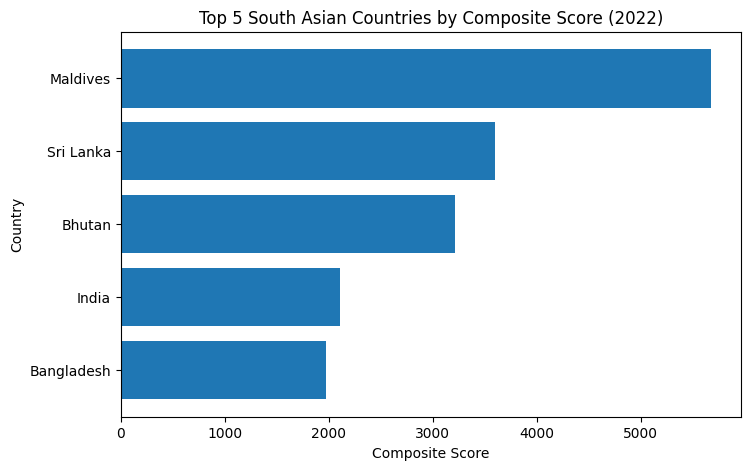

Discussion: Composite score ranking may differ from HDI ranking because it uses selected components with specific weights.


In [24]:
# plotting top 5 countries based on composite score
top5_composite = composite_ranking.head(5).sort_values(
    by="Composite Score", ascending=True
)

plt.figure(figsize=(8, 5))
plt.barh(top5_composite["country"], top5_composite["Composite Score"])
plt.title("Top 5 South Asian Countries by Composite Score (2022)")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.show()

print(
    "Discussion: Composite score ranking may differ from HDI ranking "
    "because it uses selected components with specific weights."
)


In [25]:
# defining IQR-based outlier detection function
def detect_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return (series < lower) | (series > upper)

# detecting outliers for HDI and GNI
sa_2022_df["HDI Outlier"] = detect_outliers_iqr(sa_2022_df["hdi"])
sa_2022_df["GNI Outlier"] = detect_outliers_iqr(sa_2022_df["gross_inc_percap"])
sa_2022_df["Any Outlier"] = sa_2022_df["HDI Outlier"] | sa_2022_df["GNI Outlier"]

print("Outlier countries in South Asia (2022):")
outliers = sa_2022_df[sa_2022_df["Any Outlier"]][
    ["country", "hdi", "gross_inc_percap", "HDI Outlier", "GNI Outlier"]
]

if outliers.empty:
    print("No outliers detected.")
else:
    print(outliers.to_string(index=False))


Outlier countries in South Asia (2022):
No outliers detected.


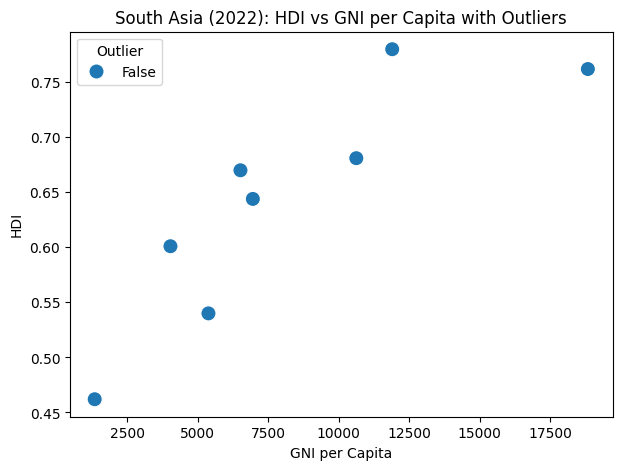

Discussion: Outliers indicate countries with unusually high or low HDI-income relationships compared to others.


In [26]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=sa_2022_df,
    x="gross_inc_percap",
    y="hdi",
    hue="Any Outlier",
    style="Any Outlier",
    s=120
)

plt.title("South Asia (2022): HDI vs GNI per Capita with Outliers")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.legend(title="Outlier")
plt.show()

print(
    "Discussion: Outliers indicate countries with unusually high or low "
    "HDI-income relationships compared to others."
)



Pearson correlation between gender_development and HDI (South Asia, 2022): 0.8847595354487651


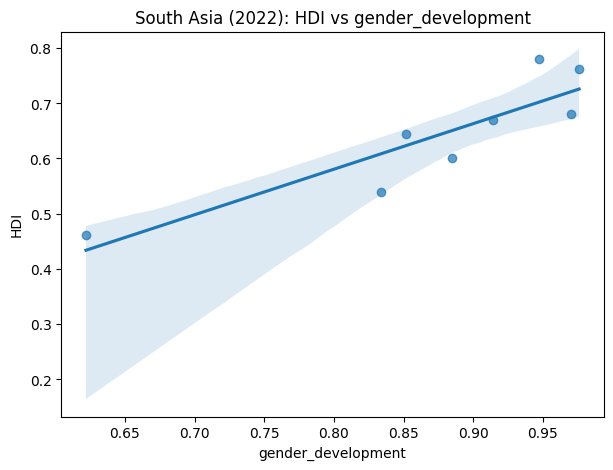

Pearson correlation between life_expectancy and HDI (South Asia, 2022): 0.9281974040239384


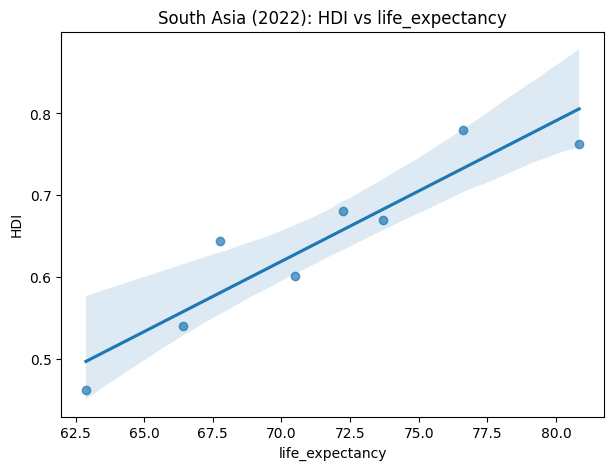

Discussion: A stronger positive correlation indicates that the selected metric tends to increase alongside HDI, while a weaker correlation suggests a less consistent relationship.


In [27]:
# exploring relationships between HDI and selected metrics (South Asia, 2022)
metrics_to_compare = ["gender_development", "life_expectancy"]

for metric in metrics_to_compare:
    if metric not in sa_2022_df.columns:
        print(f"{metric} variable not available in the dataset.")
        continue

    rel_df = sa_2022_df.dropna(subset=["hdi", metric]).copy()

    if rel_df.empty:
        print(f"No valid rows available to compute relationship for {metric}.")
        continue

    corr_value = rel_df[["hdi", metric]].corr(method="pearson").iloc[0, 1]
    print(f"Pearson correlation between {metric} and HDI (South Asia, 2022):", corr_value)

    plt.figure(figsize=(7, 5))
    sns.regplot(data=rel_df, x=metric, y="hdi", scatter_kws={"alpha": 0.7})
    plt.title(f"South Asia (2022): HDI vs {metric}")
    plt.xlabel(metric)
    plt.ylabel("HDI")
    plt.show()

print(
    "Discussion: A stronger positive correlation indicates that the selected metric "
    "tends to increase alongside HDI, while a weaker correlation suggests a less consistent relationship."
)


South Asia ranked by GNI HDI Gap (descending):
    country  gross_inc_percap   hdi  GNI HDI Gap
   Maldives      18846.792190 0.762 18846.030190
  Sri Lanka      11899.498470 0.780 11898.718470
     Bhutan      10624.873880 0.681 10624.192880
      India       6950.526798 0.644  6949.882798
 Bangladesh       6511.122178 0.670  6510.452178
   Pakistan       5374.270423 0.540  5373.730423
      Nepal       4025.554685 0.601  4024.953685
Afghanistan       1335.205733 0.462  1334.743733

South Asia ranked by GNI HDI Gap (ascending):
    country  gross_inc_percap   hdi  GNI HDI Gap
Afghanistan       1335.205733 0.462  1334.743733
      Nepal       4025.554685 0.601  4024.953685
   Pakistan       5374.270423 0.540  5373.730423
 Bangladesh       6511.122178 0.670  6510.452178
      India       6950.526798 0.644  6949.882798
     Bhutan      10624.873880 0.681 10624.192880
  Sri Lanka      11899.498470 0.780 11898.718470
   Maldives      18846.792190 0.762 18846.030190


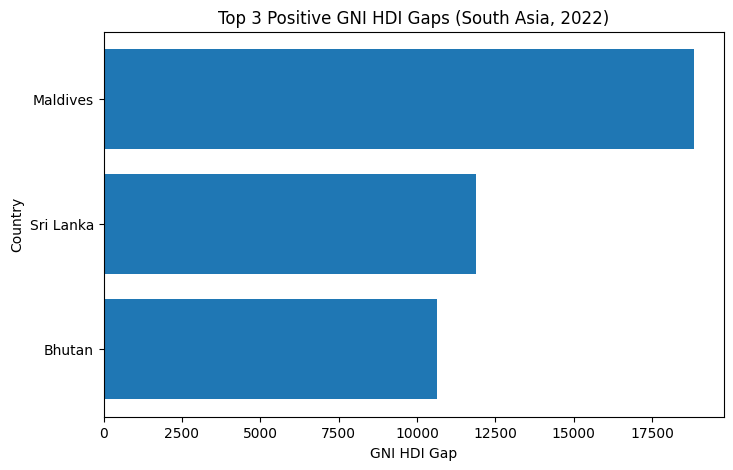

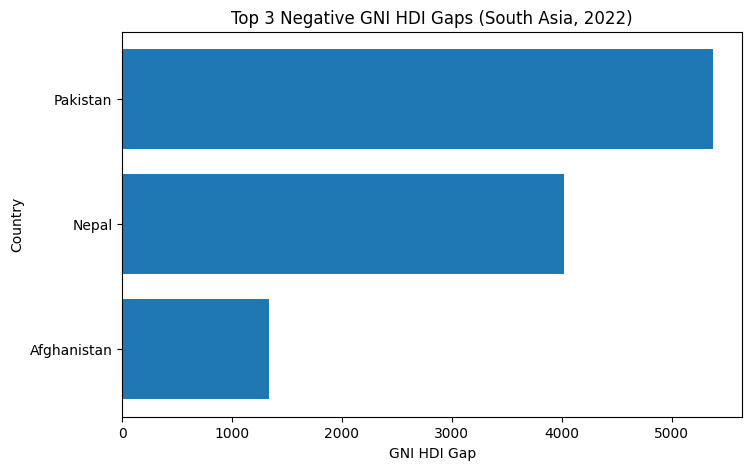

Discussion: A large positive gap can indicate income is high relative to HDI, while a smaller or negative gap may suggest income is low or that broader human development outcomes are stronger than income alone would imply.


In [28]:
# gap analysis between GNI per Capita and HDI (South Asia, 2022)
if "gross_inc_percap" not in sa_2022_df.columns:
    print("gross_inc_percap variable not available in the dataset.")
else:
    gap_df = sa_2022_df.dropna(subset=["gross_inc_percap", "hdi"]).copy()
    gap_df["GNI HDI Gap"] = gap_df["gross_inc_percap"] - gap_df["hdi"]

    gap_ranking_desc = gap_df.sort_values(
        "GNI HDI Gap", ascending=False
    )[["country", "gross_inc_percap", "hdi", "GNI HDI Gap"]]

    gap_ranking_asc = gap_df.sort_values(
        "GNI HDI Gap", ascending=True
    )[["country", "gross_inc_percap", "hdi", "GNI HDI Gap"]]

    print("South Asia ranked by GNI HDI Gap (descending):")
    print(gap_ranking_desc.to_string(index=False))

    print()
    print("South Asia ranked by GNI HDI Gap (ascending):")
    print(gap_ranking_asc.to_string(index=False))

    top3_positive = gap_ranking_desc.head(3).sort_values("GNI HDI Gap", ascending=True)
    top3_negative = gap_ranking_asc.head(3)

    plt.figure(figsize=(8, 5))
    plt.barh(top3_positive["country"], top3_positive["GNI HDI Gap"])
    plt.title("Top 3 Positive GNI HDI Gaps (South Asia, 2022)")
    plt.xlabel("GNI HDI Gap")
    plt.ylabel("Country")
    plt.show()

    plt.figure(figsize=(8, 5))
    plt.barh(top3_negative["country"], top3_negative["GNI HDI Gap"])
    plt.title("Top 3 Negative GNI HDI Gaps (South Asia, 2022)")
    plt.xlabel("GNI HDI Gap")
    plt.ylabel("Country")
    plt.show()

    print(
        "Discussion: A large positive gap can indicate income is high relative to HDI, "
        "while a smaller or negative gap may suggest income is low or that broader human development outcomes "
        "are stronger than income alone would imply."
    )


In [29]:
# defining Middle East countries as per assignment
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# filtering dataset for years 2020–2022
hdi_2020_2022_df = df[df["year"].isin([2020, 2021, 2022])].copy()

# cleaning country names
hdi_2020_2022_df["country"] = hdi_2020_2022_df["country"].astype(str).str.strip()

# creating regional subsets
southasia_2020_2022 = hdi_2020_2022_df[
    hdi_2020_2022_df["country"].isin(south_asia_countries)
].copy()

middleeast_2020_2022 = hdi_2020_2022_df[
    hdi_2020_2022_df["country"].isin(middle_east_countries)
].copy()

print("South Asia subset shape:", southasia_2020_2022.shape)
print("Middle East subset shape:", middleeast_2020_2022.shape)


#saving South Asia and Middle East subsets to Google Drive
output_sa_2020_2022_path = "/content/drive/MyDrive/assignment 1/HDI SouthAsia 2020 2022.csv"
output_me_2020_2022_path = "/content/drive/MyDrive/assignment 1/HDI MiddleEast 2020 2022.csv"

southasia_2020_2022.to_csv(output_sa_2020_2022_path, index=False)
middleeast_2020_2022.to_csv(output_me_2020_2022_path, index=False)

print("South Asia (2020-2022) subset saved at:")
print(output_sa_2020_2022_path)

print("Middle East (2020-2022) subset saved at:")
print(output_me_2020_2022_path)


South Asia subset shape: (24, 30)
Middle East subset shape: (33, 30)
South Asia (2020-2022) subset saved at:
/content/drive/MyDrive/assignment 1/HDI SouthAsia 2020 2022.csv
Middle East (2020-2022) subset saved at:
/content/drive/MyDrive/assignment 1/HDI MiddleEast 2020 2022.csv


In [30]:
# calculating mean and standard deviation of HDI
sa_mean = southasia_2020_2022["hdi"].mean()
sa_std = southasia_2020_2022["hdi"].std()

me_mean = middleeast_2020_2022["hdi"].mean()
me_std = middleeast_2020_2022["hdi"].std()

print("South Asia mean HDI:", sa_mean)
print("South Asia std HDI:", sa_std)

print("\nMiddle East mean HDI:", me_mean)
print("Middle East std HDI:", me_std)

print(
    "\nInsight: Region with higher mean HDI performs better on average "
    "across the selected years."
)


South Asia mean HDI: 0.6395833333333333
South Asia std HDI: 0.09827331747496995

Middle East mean HDI: 0.7889090909090909
Middle East std HDI: 0.14129476362297624

Insight: Region with higher mean HDI performs better on average across the selected years.


In [31]:
# computing average HDI per country
sa_avg = southasia_2020_2022.groupby("country")["hdi"].mean().reset_index()
me_avg = middleeast_2020_2022.groupby("country")["hdi"].mean().reset_index()

# selecting top and bottom performers
sa_top3 = sa_avg.nlargest(3, "hdi")
sa_bottom3 = sa_avg.nsmallest(3, "hdi")

me_top3 = me_avg.nlargest(3, "hdi")
me_bottom3 = me_avg.nsmallest(3, "hdi")

print("South Asia Top 3:\n", sa_top3.to_string(index=False))
print("\nSouth Asia Bottom 3:\n", sa_bottom3.to_string(index=False))
print("\nMiddle East Top 3:\n", me_top3.to_string(index=False))
print("\nMiddle East Bottom 3:\n", me_bottom3.to_string(index=False))


South Asia Top 3:
   country      hdi
Sri Lanka 0.780000
 Maldives 0.750667
   Bhutan 0.677667

South Asia Bottom 3:
     country      hdi
Afghanistan 0.474333
   Pakistan 0.537667
      Nepal 0.595000

Middle East Top 3:
              country      hdi
United Arab Emirates 0.932667
              Israel 0.910667
             Bahrain 0.885333

Middle East Bottom 3:
 country      hdi
  Yemen 0.426333
   Iraq 0.667000
Lebanon 0.730000


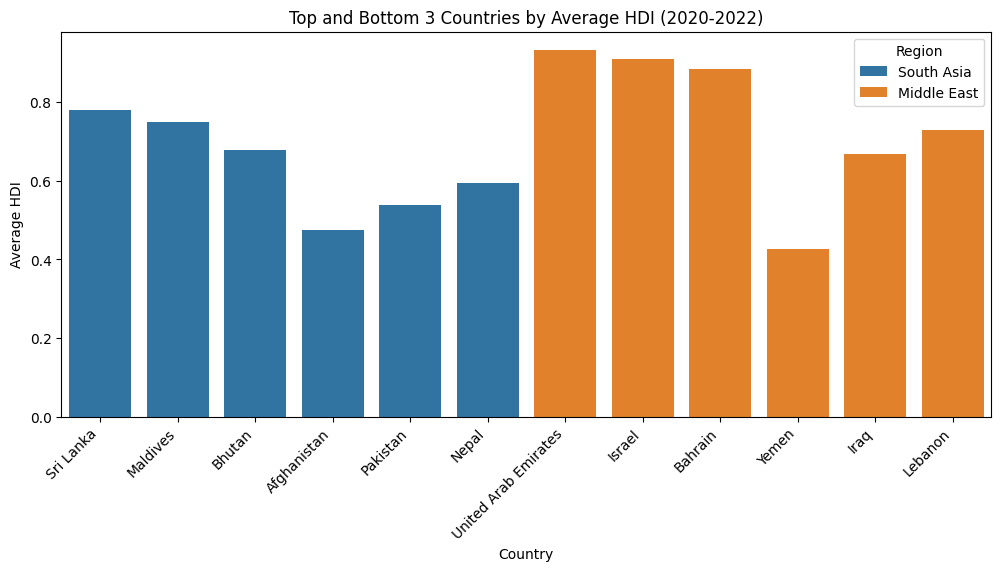

Caption: This bar chart compares the top and bottom HDI performers within South Asia and the Middle East, based on average HDI across 2020 to 2022.


In [32]:
# creating bar chart comparing top and bottom performers across regions
sa_top3_plot = sa_top3.copy()
sa_top3_plot["Region"] = "South Asia"
sa_top3_plot["Group"] = "Top 3"

sa_bottom3_plot = sa_bottom3.copy()
sa_bottom3_plot["Region"] = "South Asia"
sa_bottom3_plot["Group"] = "Bottom 3"

me_top3_plot = me_top3.copy()
me_top3_plot["Region"] = "Middle East"
me_top3_plot["Group"] = "Top 3"

me_bottom3_plot = me_bottom3.copy()
me_bottom3_plot["Region"] = "Middle East"
me_bottom3_plot["Group"] = "Bottom 3"

top_bottom_df = pd.concat(
    [sa_top3_plot, sa_bottom3_plot, me_top3_plot, me_bottom3_plot],
    ignore_index=True
)

plt.figure(figsize=(12, 5))
sns.barplot(data=top_bottom_df, x="country", y="hdi", hue="Region")
plt.title("Top and Bottom 3 Countries by Average HDI (2020-2022)")
plt.xlabel("Country")
plt.ylabel("Average HDI")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Region")
plt.show()

print(
    "Caption: This bar chart compares the top and bottom HDI performers within South Asia and the Middle East, "
    "based on average HDI across 2020 to 2022."
)


Metric comparison table (regional averages, 2020-2022):
            Metric      Region        Value
gender_development  South Asia     0.881458
gender_development Middle East     0.896545
   life_expectancy  South Asia    70.970083
   life_expectancy Middle East    75.855455
  gross_inc_percap  South Asia  7766.509931
  gross_inc_percap Middle East 37750.770520


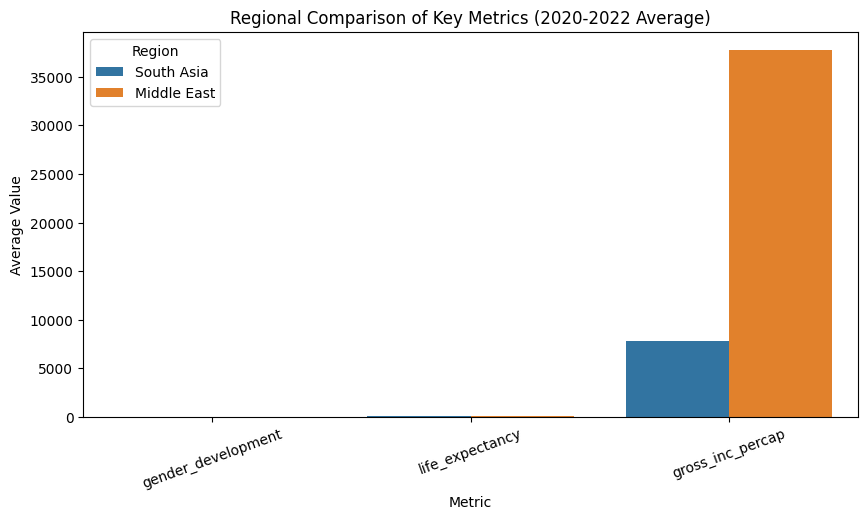


Metric with greatest disparity between regions: gross_inc_percap
Region               Middle East   South Asia  Absolute Difference
Metric                                                            
gender_development      0.896545     0.881458             0.015087
gross_inc_percap    37750.770520  7766.509931         29984.260588
life_expectancy        75.855455    70.970083             4.885371


In [33]:
# comparing selected metrics across regions using grouped bar charts
metrics_compare = ["gender_development", "life_expectancy", "gross_inc_percap"]

comparison_rows = []

for metric in metrics_compare:
    if metric not in southasia_2020_2022.columns or metric not in middleeast_2020_2022.columns:
        print(f"{metric} variable not available in the dataset.")
        continue

    sa_metric = pd.to_numeric(southasia_2020_2022[metric], errors="coerce")
    me_metric = pd.to_numeric(middleeast_2020_2022[metric], errors="coerce")

    sa_mean_metric = sa_metric.mean()
    me_mean_metric = me_metric.mean()

    comparison_rows.append({"Metric": metric, "Region": "South Asia", "Value": sa_mean_metric})
    comparison_rows.append({"Metric": metric, "Region": "Middle East", "Value": me_mean_metric})

comparison_df = pd.DataFrame(comparison_rows)

if comparison_df.empty:
    print("No metrics available for comparison.")
else:
    print("Metric comparison table (regional averages, 2020-2022):")
    print(comparison_df.to_string(index=False))

    plt.figure(figsize=(10, 5))
    sns.barplot(data=comparison_df, x="Metric", y="Value", hue="Region")
    plt.title("Regional Comparison of Key Metrics (2020-2022 Average)")
    plt.xlabel("Metric")
    plt.ylabel("Average Value")
    plt.xticks(rotation=20)
    plt.legend(title="Region")
    plt.show()

    # identifying greatest disparity
    disparity = (
        comparison_df.pivot_table(index="Metric", columns="Region", values="Value")
        .dropna()
    )

    if not disparity.empty:
        disparity["Absolute Difference"] = (disparity["Middle East"] - disparity["South Asia"]).abs()
        greatest_metric = disparity["Absolute Difference"].idxmax()

        print()
        print("Metric with greatest disparity between regions:", greatest_metric)
        print(disparity.to_string())


In [34]:
#computing HDI range and coefficient of variation (CV) for each region
def hdi_variation_stats(region_df, region_name):
    hdi_series = pd.to_numeric(region_df["hdi"], errors="coerce").dropna()
    hdi_range = hdi_series.max() - hdi_series.min()
    hdi_mean = hdi_series.mean()
    hdi_std = hdi_series.std()
    hdi_cv = hdi_std / hdi_mean if hdi_mean != 0 else np.nan

    print(f"{region_name} HDI Range (max-min):", hdi_range)
    print(f"{region_name} HDI Mean:", hdi_mean)
    print(f"{region_name} HDI Std:", hdi_std)
    print(f"{region_name} HDI Coefficient of Variation (CV):", hdi_cv)
    print()

hdi_variation_stats(southasia_2020_2022, "South Asia")
hdi_variation_stats(middleeast_2020_2022, "Middle East")

print(
    "Insight: Higher range or CV indicates greater variation in HDI values within that region."
)


South Asia HDI Range (max-min): 0.321
South Asia HDI Mean: 0.6395833333333333
South Asia HDI Std: 0.09827331747496995
South Asia HDI Coefficient of Variation (CV): 0.1536520924690084

Middle East HDI Range (max-min): 0.5130000000000001
Middle East HDI Mean: 0.7889090909090909
Middle East HDI Std: 0.14129476362297624
Middle East HDI Coefficient of Variation (CV): 0.17910145193048382

Insight: Higher range or CV indicates greater variation in HDI values within that region.


South Asia Pearson correlation between gender_development and HDI: 0.8742177004831323


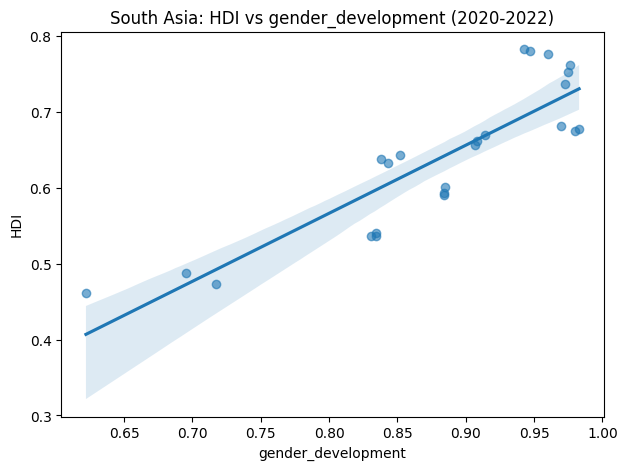

Middle East Pearson correlation between gender_development and HDI: 0.935669752572412


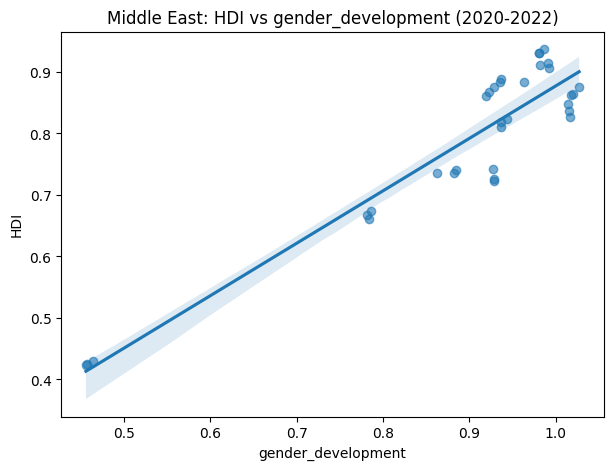

South Asia Pearson correlation between life_expectancy and HDI: 0.938764138541662


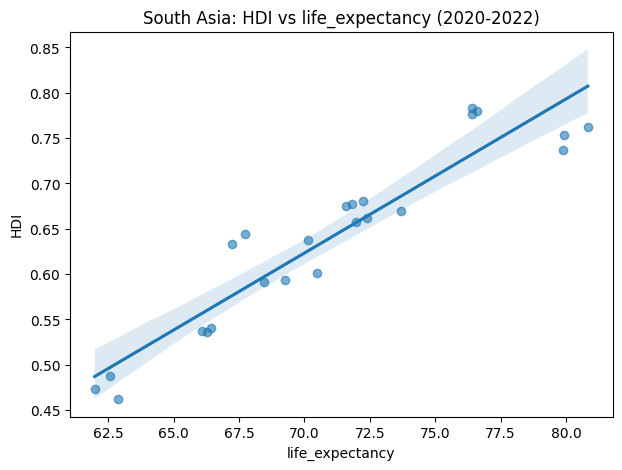

Middle East Pearson correlation between life_expectancy and HDI: 0.9331227568940162


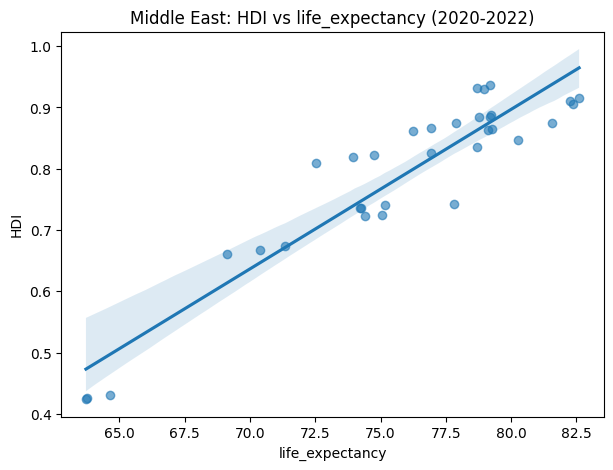

Interpretation: Trendlines help visualize whether higher values of the selected metric are associated with higher HDI.


In [35]:
#creating scatter plots with trendlines for correlations with HDI
correlation_metrics = ["gender_development", "life_expectancy"]

for metric in correlation_metrics:
    if metric not in southasia_2020_2022.columns:
        print(f"{metric} variable not available for South Asia.")
    else:
        sa_df_corr = southasia_2020_2022.dropna(subset=["hdi", metric]).copy()
        sa_corr_value = sa_df_corr[["hdi", metric]].corr(method="pearson").iloc[0, 1]
        print(f"South Asia Pearson correlation between {metric} and HDI:", sa_corr_value)

        plt.figure(figsize=(7, 5))
        sns.regplot(data=sa_df_corr, x=metric, y="hdi", scatter_kws={"alpha": 0.6})
        plt.title(f"South Asia: HDI vs {metric} (2020-2022)")
        plt.xlabel(metric)
        plt.ylabel("HDI")
        plt.show()

    if metric not in middleeast_2020_2022.columns:
        print(f"{metric} variable not available for Middle East.")
    else:
        me_df_corr = middleeast_2020_2022.dropna(subset=["hdi", metric]).copy()
        me_corr_value = me_df_corr[["hdi", metric]].corr(method="pearson").iloc[0, 1]
        print(f"Middle East Pearson correlation between {metric} and HDI:", me_corr_value)

        plt.figure(figsize=(7, 5))
        sns.regplot(data=me_df_corr, x=metric, y="hdi", scatter_kws={"alpha": 0.6})
        plt.title(f"Middle East: HDI vs {metric} (2020-2022)")
        plt.xlabel(metric)
        plt.ylabel("HDI")
        plt.show()

print(
    "Interpretation: Trendlines help visualize whether higher values of the selected metric are associated with higher HDI."
)


South Asia outlier summary (count):
Any Outlier
False    24


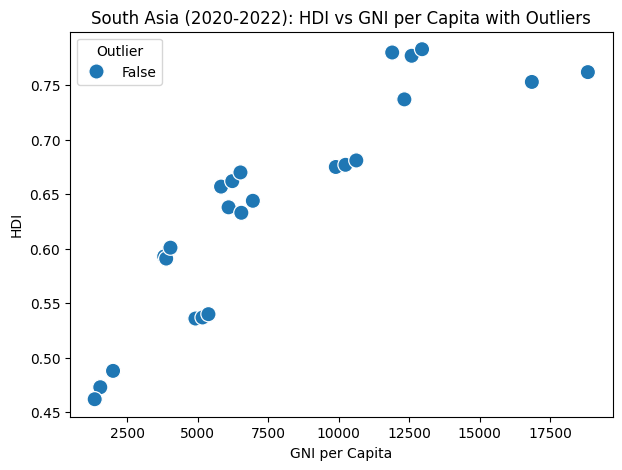

Discussion: Outliers in South Asia represent countries whose HDI or income levels are unusually high or low compared to the rest of the region.

Middle East outlier summary (count):
Any Outlier
False    30
True      3


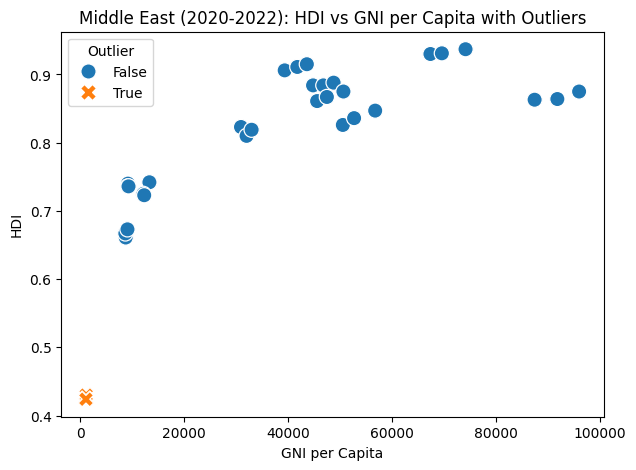

Discussion: Outliers in Middle East represent countries whose HDI or income levels are unusually high or low compared to the rest of the region.



In [36]:
#detecting outliers for each region using the 1.5 x IQR rule and plotting
def iqr_bounds(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

def outlier_scatter(region_df, region_name):
    if "gross_inc_percap" not in region_df.columns:
        print(f"gross_inc_percap variable not available for {region_name}.")
        return

    df_plot = region_df.dropna(subset=["hdi", "gross_inc_percap"]).copy()
    df_plot["hdi"] = pd.to_numeric(df_plot["hdi"], errors="coerce")
    df_plot["gross_inc_percap"] = pd.to_numeric(df_plot["gross_inc_percap"], errors="coerce")
    df_plot = df_plot.dropna(subset=["hdi", "gross_inc_percap"]).copy()

    hdi_low, hdi_up = iqr_bounds(df_plot["hdi"])
    gni_low, gni_up = iqr_bounds(df_plot["gross_inc_percap"])

    df_plot["HDI Outlier"] = (df_plot["hdi"] < hdi_low) | (df_plot["hdi"] > hdi_up)
    df_plot["GNI Outlier"] = (df_plot["gross_inc_percap"] < gni_low) | (df_plot["gross_inc_percap"] > gni_up)
    df_plot["Any Outlier"] = df_plot["HDI Outlier"] | df_plot["GNI Outlier"]

    print(f"{region_name} outlier summary (count):")
    print(df_plot["Any Outlier"].value_counts(dropna=False).to_string())

    plt.figure(figsize=(7, 5))
    sns.scatterplot(
        data=df_plot,
        x="gross_inc_percap",
        y="hdi",
        hue="Any Outlier",
        style="Any Outlier",
        s=120
    )
    plt.title(f"{region_name} (2020-2022): HDI vs GNI per Capita with Outliers")
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.legend(title="Outlier")
    plt.show()

    print(
        f"Discussion: Outliers in {region_name} represent countries whose HDI or income levels "
        "are unusually high or low compared to the rest of the region."
    )
    print()

outlier_scatter(southasia_2020_2022, "South Asia")
outlier_scatter(middleeast_2020_2022, "Middle East")


In [37]:
#selecting metrics for correlation analysis
metrics = ["gender_development", "life_expectancy"]

print("Correlation with HDI:")

for metric in metrics:
    sa_corr = southasia_2020_2022[[metric, "hdi"]].corr().iloc[0, 1]
    me_corr = middleeast_2020_2022[[metric, "hdi"]].corr().iloc[0, 1]

    print(f"{metric} vs HDI (South Asia):", sa_corr)
    print(f"{metric} vs HDI (Middle East):", me_corr)


Correlation with HDI:
gender_development vs HDI (South Asia): 0.8742177004831324
gender_development vs HDI (Middle East): 0.935669752572412
life_expectancy vs HDI (South Asia): 0.9387641385416619
life_expectancy vs HDI (Middle East): 0.9331227568940166


In [38]:
print(
    "Final Insight:\n"
    "Middle East countries generally demonstrate higher HDI values compared "
    "to South Asian countries, primarily due to stronger income levels and "
    "health indicators. However, variation within regions highlights that "
    "development is not uniform and depends on multiple socio-economic factors."
)


Final Insight:
Middle East countries generally demonstrate higher HDI values compared to South Asian countries, primarily due to stronger income levels and health indicators. However, variation within regions highlights that development is not uniform and depends on multiple socio-economic factors.
